# Metadata

```
Course:  DS 5100
Topic:   Monte Carlo Simulation
Author:  Eric Tang
Date:    15 July 2022
```

# Setup

In [1]:
from montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd

Congratulations! You have the Monte Carlo modules installed!


# Scenario 1

In [2]:
# 1 - Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

# 2 - Play a game of 1000 flips of three coins with all fair dice.
fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(1000)

# 3 - Play a game of 1000 flips with two unfair dice and one fair die.
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_game.play(1000)

# 4 - For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
fair_analyzer = Analyzer(fair_game)
fair_wins = fair_analyzer.jackpot()

unfair_analyzer = Analyzer(unfair_game)
unfair_wins = unfair_analyzer.jackpot()

# 5 - Compute relative frequency as the number of jackpots over the total number of rolls.
fair_frequency = fair_wins / 1000
unfair_frequency = unfair_wins / 1000

# 6 - Show your results, comparing the two relative frequencies, in a simple bar chart.
comparison_df = pd.DataFrame({'Frequency': ['Fair', 'Unfair'], 'Wins': [fair_frequency, unfair_frequency]})
output = comparison_df.plot.bar(x = 'Frequency', y = 'Wins', rot=0)

# Scenario 2

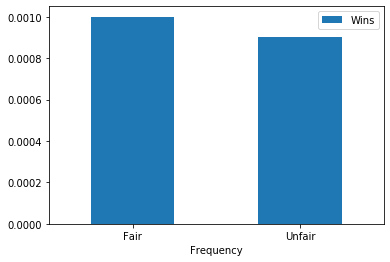

In [3]:
# 1 - Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. 
# One unfair die (Type 1) will weight 6 five times more than the others 
# (i.e. it has weight of 5 and the others a weight of 1 each). 
# The other unfair die (Type 2) will  weight 1 five times more than the others.
fair_die = Die([1, 2, 3, 4, 5, 6])
unfair_die1 = Die([1, 2, 3, 4, 5, 6])
unfair_die2 = Die([1, 2, 3, 4, 5, 6])

unfair_die1.change_weight(6, 5)    
unfair_die2.change_weight(1, 5) 

# 2 - Play a game of 10000 rolls with 5 fair dice.
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game.play(10000)

# 3 - Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
unfair_game = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
unfair_game.play(10000)

# 4 - For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, 
# comparing the two relative frequencies, in a simple bar chart.
fair_analyzer = Analyzer(fair_game)
fair_wins = fair_analyzer.jackpot()

unfair_analyzer = Analyzer(unfair_game)
unfair_wins = unfair_analyzer.jackpot()

fair_frequency = fair_wins / 10000
unfair_frequency = unfair_wins / 10000

comparison_df = pd.DataFrame({'Frequency': ['Fair', 'Unfair'], 'Wins': [fair_frequency, unfair_frequency]})
output = comparison_df.plot.bar(x = 'Frequency', y = 'Wins', rot=0)

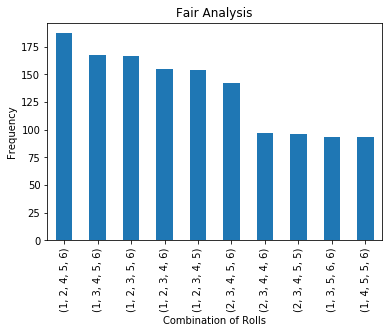

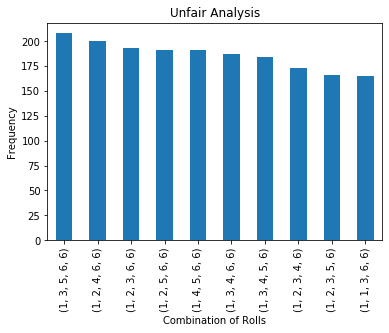

In [4]:
# 5 - Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.
fair_combo = fair_analyzer.combo()[0:10]
unfair_combo = unfair_analyzer.combo()[0:10]
output1 = fair_combo.plot.bar(xlabel = "Combination of Rolls", ylabel = "Frequency", title = "Fair Analysis", legend = False)
output2 = unfair_combo.plot.bar(xlabel = "Combination of Rolls", ylabel = "Frequency", title = "Unfair Analysis", legend = False)

# Scenario 3

In [5]:
# 1 - Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
letters_die = Die(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                  'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
letters_weights = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016,
                   5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 
                   1.2899, 0.2902, 1.7779, 0.2722]
for letter in letters_die.show()['face']:
    letters_die.change_weight(letter, letters_weights.pop(0))

# 2 - Play a game involving 5 of these dice with 1000 rolls.
letters_game = Game([letters_die, letters_die, letters_die, letters_die, letters_die])
letters_game.play(1000)

# 3 - How many combos can you see that look like actual English words?
print(letters_game.show().to_string())


Dice  0  1  2  3  4
Roll               
0     I  C  O  I  M
1     M  A  O  U  I
2     E  D  O  O  I
3     L  N  P  C  F
4     I  I  O  R  S
5     A  S  H  L  S
6     E  D  T  S  C
7     S  A  S  A  N
8     C  R  S  I  C
9     C  M  O  O  N
10    N  R  V  D  I
11    I  E  C  R  H
12    D  H  R  I  B
13    I  U  F  T  B
14    C  R  O  K  E
15    N  C  D  L  N
16    R  T  T  M  L
17    N  P  E  X  D
18    E  B  U  E  C
19    M  C  A  N  G
20    T  F  A  J  E
21    R  A  W  N  E
22    S  U  O  Q  S
23    L  C  S  R  O
24    U  C  H  G  E
25    Y  E  E  D  A
26    E  I  N  R  E
27    A  I  T  O  E
28    A  L  A  V  O
29    L  I  T  Y  S
30    H  P  U  M  E
31    U  P  D  S  T
32    C  R  N  E  S
33    T  C  I  E  H
34    I  R  O  C  O
35    P  G  N  L  A
36    E  R  D  U  A
37    E  U  K  E  T
38    E  T  E  L  G
39    W  O  C  G  M
40    O  U  R  R  I
41    R  E  Z  O  S
42    N  O  H  Y  B
43    H  O  B  H  O
44    R  O  A  N  I
45    E  E  R  N  P
46    A  A  I  S  C
47    N  P  I  M  M


I can find around 20 words that seem like actual English words.

In [6]:
# 4 - Based on your eye count, what is the relative frequency of these words versus the rest?
letters_game.show().sample(40)

Dice,0,1,2,3,4
Roll,,,,,
663,V,L,S,T,U
981,I,B,I,T,E
175,E,K,C,S,L
212,H,N,L,O,U
887,R,L,S,S,K
920,E,V,P,E,O
871,K,S,S,I,I
603,C,E,R,N,I
641,T,G,I,A,G


Sampling the data, the relative frequency is about 1 in every 40 combinations and is an actual word or close to a word.